The Core Objectives of this project is to analyse and build a model for a Telecommunication company on her Churn data.

We will be exploring the data and build a classification model to find the most accurate of all.

In [1]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas_profiling as pp

In [2]:
#Read data and show first five rows
df = pd.read_csv(r"C:\Users\elegb\Desktop\pdf\telecom\telecom_customer_churn.csv")
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


EXPLORATORY DATA  ANALYSIS AND VISUALIZATIONS

In [3]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [4]:
# shape of the data
df.shape

(7043, 38)

The data contains 7043 rows and 38 columns 

In [5]:
#Check the data types 
df.dtypes

Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [6]:
#check for missing values
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges     682
Multiple Lines                        682
Internet Service                        0
Internet Type                        1526
Avg Monthly GB Download              1526
Online Security                      1526
Online Backup                        1526
Device Protection Plan               1526
Premium Tech Support                 1526
Streaming TV                         1526
Streaming Movies                  

In [7]:
df.Age.describe()

count    7043.000000
mean       46.509726
std        16.750352
min        19.000000
25%        32.000000
50%        46.000000
75%        60.000000
max        80.000000
Name: Age, dtype: float64

The average age of the customers is 47years.
The youngest customer is 18years whle the oldest is 80 years,

Male      3555
Female    3488
Name: Gender, dtype: int64


<AxesSubplot:ylabel='Gender'>

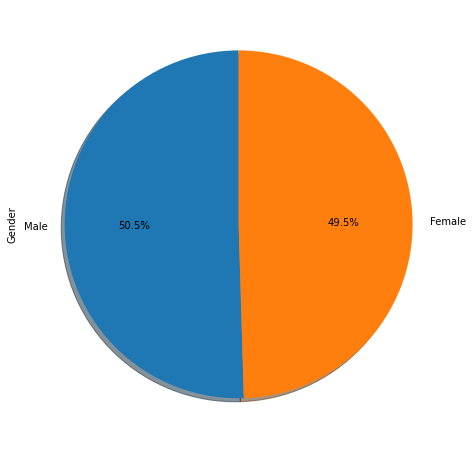

In [8]:
#how many males and females are present in the data
print(df.Gender.value_counts())
df.Gender.value_counts().plot(kind = "pie", figsize = (12,8),
                             autopct='%1.1f%%',
                             startangle=90, shadow=True,
                             )

50.5% of customers are male while 49.5% are females.

Stayed     5174
Churned    1869
Name: Customer Status, dtype: int64


<AxesSubplot:>

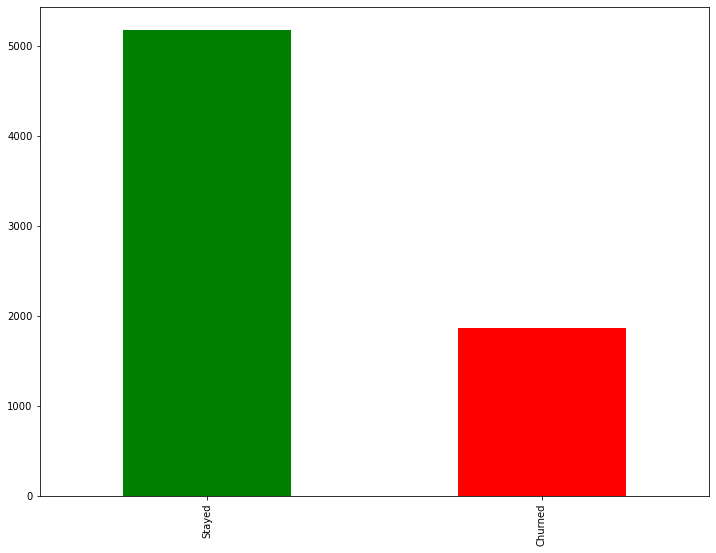

In [9]:
#our target column is supposed to contain Stayed or Churned so lets merge Stayed and Joined togther 
df["Customer Status"] = df["Customer Status"].replace(["Joined"],"Stayed")
print(df["Customer Status"].value_counts())
df['Customer Status'].value_counts().plot(kind = "bar", figsize = (12,9), color = ['green', 'red'])

1869 which is 27% of customers have left the company.

In [10]:
df.groupby("Gender")["Customer Status"].value_counts()

Gender  Customer Status
Female  Stayed             2549
        Churned             939
Male    Stayed             2625
        Churned             930
Name: Customer Status, dtype: int64

<AxesSubplot:xlabel='Gender,Customer Status'>

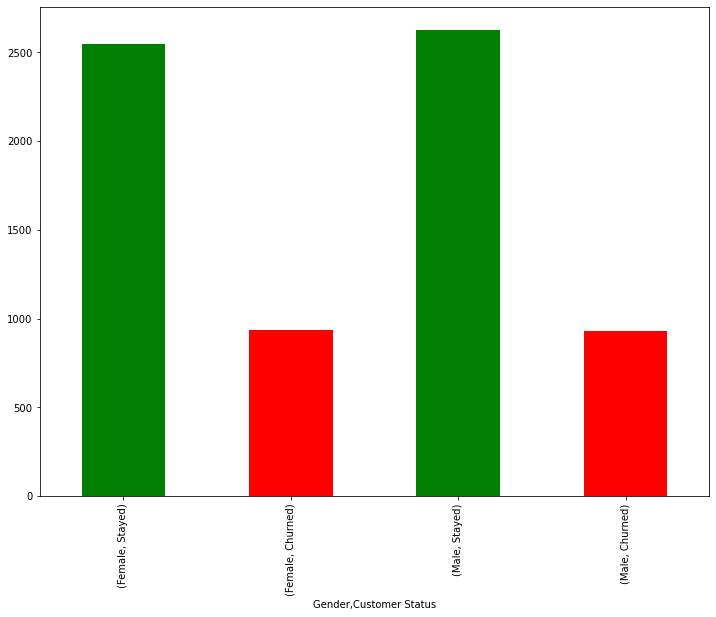

In [11]:
df.groupby("Gender")["Customer Status"].value_counts().plot(kind = "bar", color = ['green', 'red'],figsize = (12,9))

939 i.e approximately 30% of females  have left also 930 approximately 26% of males have left the company.
Approximately 50% of total churned customers are male and approximately 50% are females.

Unlimited Data  Customer Status
No              Stayed              518
                Churned             254
Yes             Stayed             3243
                Churned            1502
Name: Customer Status, dtype: int64


<AxesSubplot:xlabel='Unlimited Data,Customer Status'>

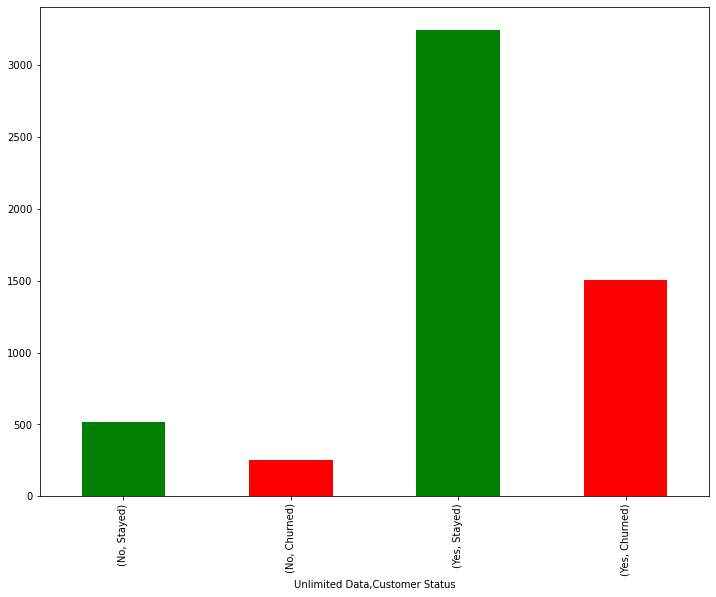

In [12]:
print(df.groupby("Unlimited Data")["Customer Status"].value_counts())
df.groupby("Unlimited Data")["Customer Status"].value_counts().plot(kind = "bar", color = ['green', 'red'],figsize = (12,9))

31.6% of those on Unlimited data package have churned also 32.9% of those not on Unlimited data package have lef.
In general 80% of Total customers that churned are on the Unlimited package while 20% are not on the Unlimited Data package.

Contract        Customer Status
Month-to-Month  Stayed             1955
                Churned            1655
One Year        Stayed             1384
                Churned             166
Two Year        Stayed             1835
                Churned              48
Name: Customer Status, dtype: int64


<AxesSubplot:xlabel='Contract,Customer Status'>

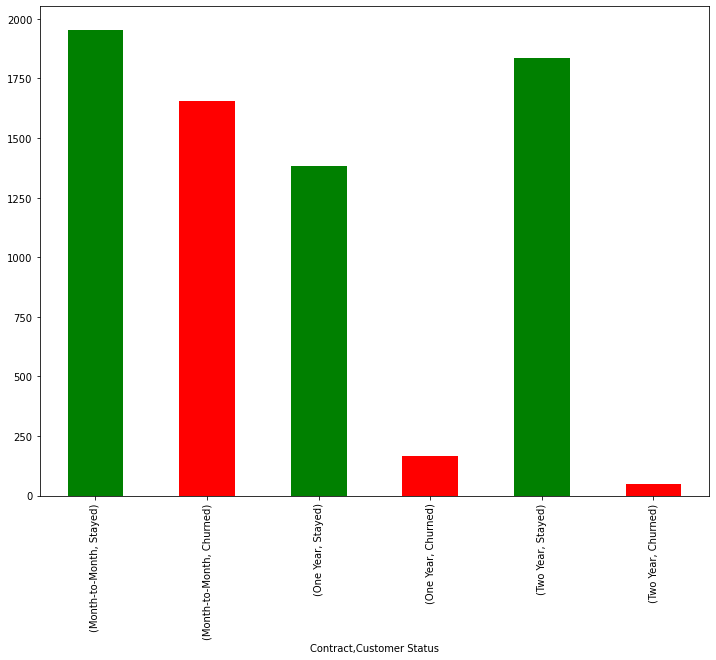

In [13]:
print(df.groupby("Contract")["Customer Status"].value_counts())
df.groupby("Contract")["Customer Status"].value_counts().plot(kind = "bar", color = ['green', 'red'],figsize = (12,9))

1655 customers on month to month package have left the company i.e 89% of those who leeft the company are on month to month package.

Offer    Customer Status
None     Stayed             2826
         Churned            1051
Offer A  Stayed              485
         Churned              35
Offer B  Stayed              723
         Churned             101
Offer C  Stayed              320
         Churned              95
Offer D  Stayed              441
         Churned             161
Offer E  Churned             426
         Stayed              379
Name: Customer Status, dtype: int64


<AxesSubplot:xlabel='Offer,Customer Status'>

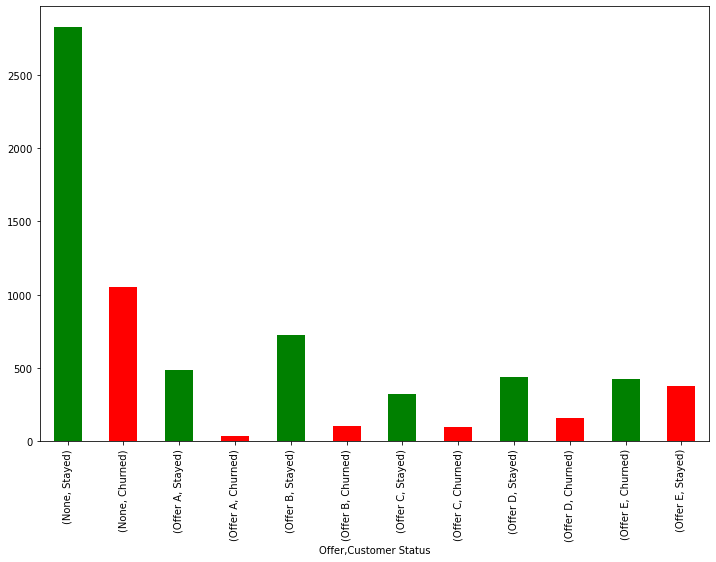

In [14]:
print(df.groupby("Offer")["Customer Status"].value_counts())
df.groupby("Offer")["Customer Status"].value_counts().plot(kind = "bar", color = ['green', 'red'], figsize = (12,8))

Customers with no offers have  the highest number of those Churned i.e 56% of customers that left dont have an offer.

Internet Service  Customer Status
No                Stayed             1413
                  Churned             113
Yes               Stayed             3761
                  Churned            1756
Name: Customer Status, dtype: int64


<AxesSubplot:xlabel='Internet Service,Customer Status'>

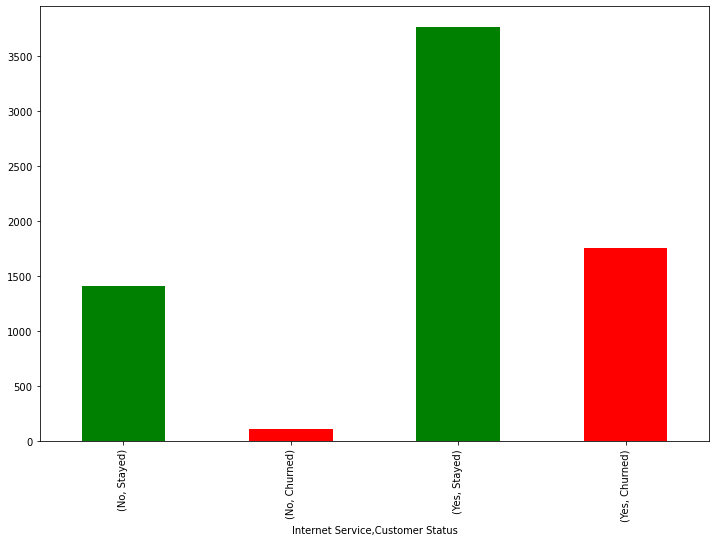

In [15]:
print(df.groupby("Internet Service")["Customer Status"].value_counts())
df.groupby("Internet Service")["Customer Status"].value_counts().plot(kind = "bar", color = ['green', 'red'], figsize = (12,8))

7% of customers not using internet service have churned while 32% of those using Internet Service have churned.
In general 94% of churned customers uses internet services while 6% of churned customers dont use internet services.

In [16]:
print(df["Number of Referrals"].describe())
total = df["Number of Referrals"].sum()
print(f"The customers have referred a toal of {total} customers")

count    7043.000000
mean        1.951867
std         3.001199
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max        11.000000
Name: Number of Referrals, dtype: float64
The customers have referred a toal of 13747 customers


The customers have on an average referred  two customers each.

In [17]:
Total = df["Total Revenue"].sum()
print (f"The company have generated the sum of {Total} from the customers")

The company have generated the sum of 21371131.69 from the customers


<AxesSubplot:>

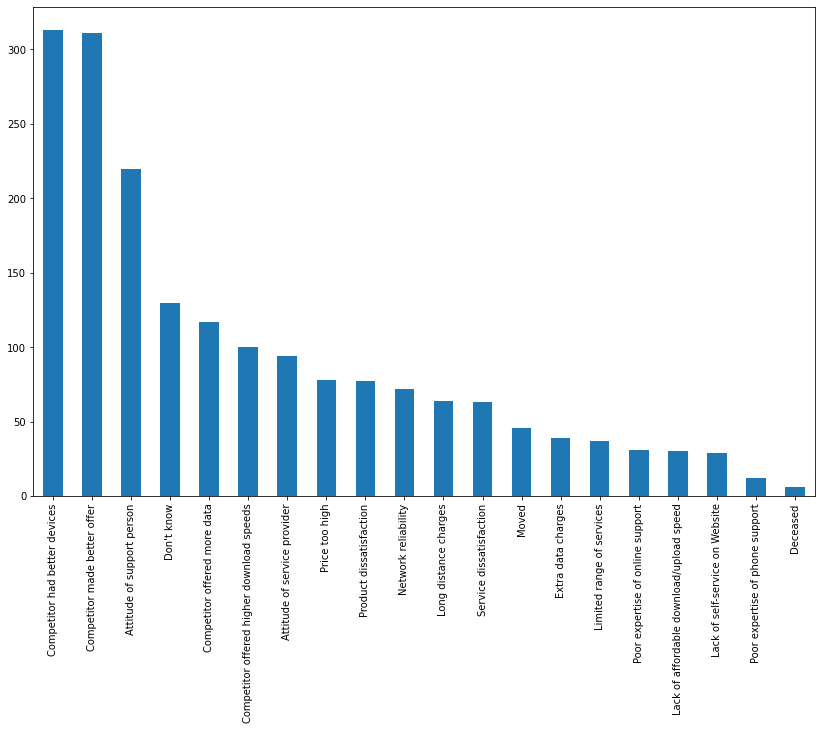

In [18]:
df['Churn Reason'].value_counts().plot(kind = "bar", figsize = (14,9))

The above chart shows the reasons for customer churn and thier corresponding numbers. whereas Most customers left majorly because Competitors had better devices and competitors made better offers, so i think the company should step up thier game against their competitors.

Competitor         841
Dissatisfaction    321
Attitude           314
Price              211
Other              182
Name: Churn Category, dtype: int64


<AxesSubplot:>

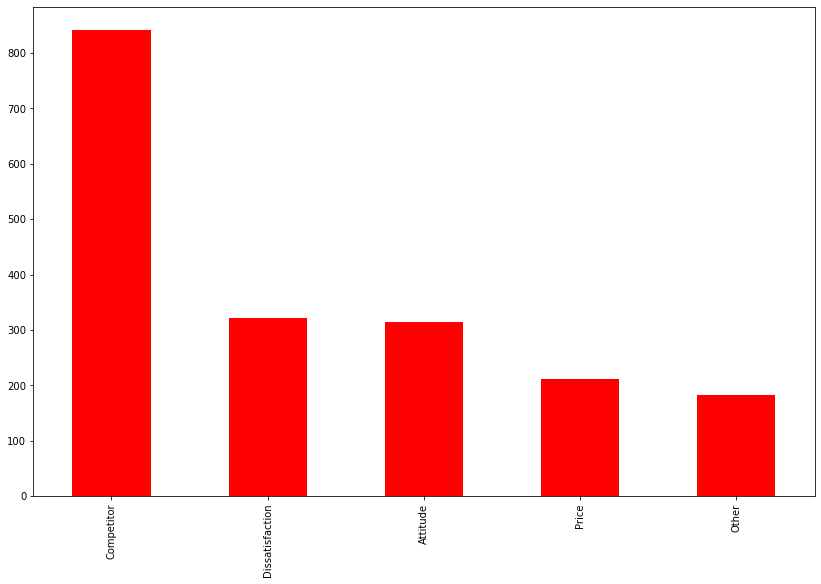

In [19]:
print(df['Churn Category'].value_counts())
df['Churn Category'].value_counts().plot(kind = "bar", figsize = (14,9), color = "red")

45% if customers that churned left because of better offer from competitors, 17% left because they are not satisfied with the companies services, 17% churned because of employees attitude, 11% left because of Price, and 10% because of other factors.

Yes    6361
No      682
Name: Phone Service, dtype: int64


<AxesSubplot:ylabel='Phone Service'>

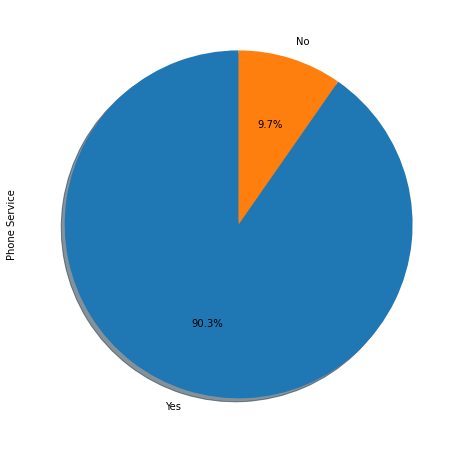

In [20]:
print(df['Phone Service'].value_counts())
df['Phone Service'].value_counts().plot(kind = "pie", figsize = (12,8),
                                        autopct='%1.1f%%',
                                        startangle=90, shadow=True,
                                        )

6361 which is approximately 90% of the customers subscribed for additional Phone servicxes

DATA PREPROCESSING AND CLEANING

<AxesSubplot:>

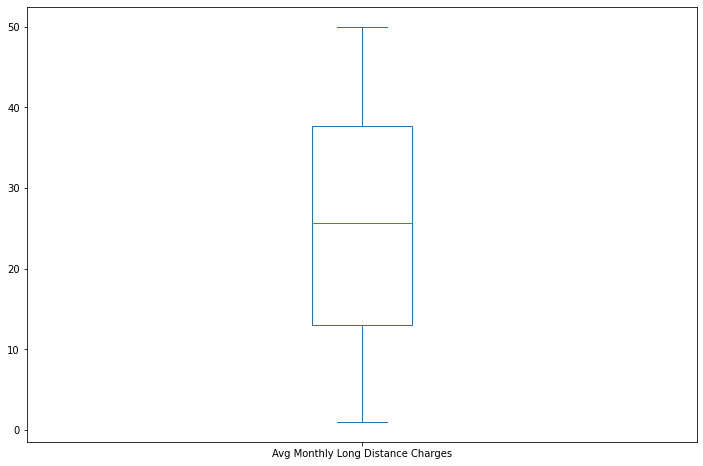

In [21]:
#Box plot of Average Monthly Long distance charges
df["Avg Monthly Long Distance Charges"].plot(kind = "box", figsize=(12,8))

Since outlier data points have a significant impact on the mean and we dont have an outlier then we can replace the missing values with the mean.

In [22]:
df["Avg Monthly Long Distance Charges"] = df["Avg Monthly Long Distance Charges"].fillna(df["Avg Monthly Long Distance Charges"].mean())
df["Avg Monthly Long Distance Charges"].isnull().sum()

0

<AxesSubplot:>

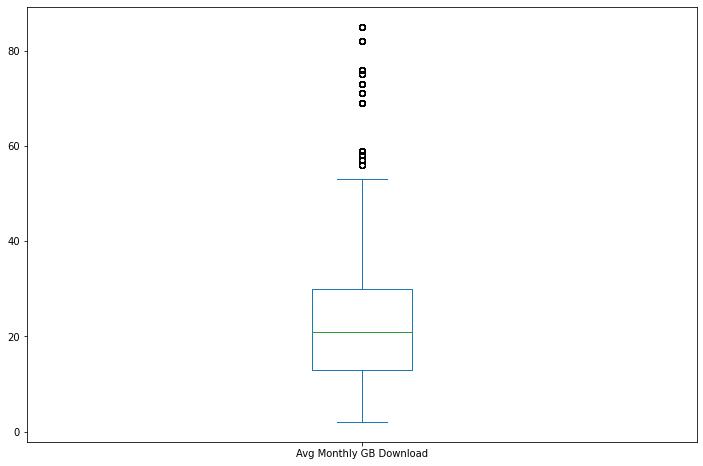

In [23]:
df["Avg Monthly GB Download"].plot(kind = "box", figsize = (12,8))

Since we have several outlier datapoints which will have a significant impact on the mean, hence we replace missing values with the median of the data.

In [24]:
df["Avg Monthly GB Download"] = df["Avg Monthly GB Download"].fillna(df["Avg Monthly GB Download"].median())
df["Avg Monthly GB Download"].isnull().sum()

0

In [25]:
print(df["Multiple Lines"].value_counts())
#Replace missing values in Multiple Lines with the modal value which is No.
df["Multiple Lines"] = df["Multiple Lines"].fillna("No").astype("category").cat.codes
#Lets now see if we still have missing values
print(df["Multiple Lines"].isnull().sum())

No     3390
Yes    2971
Name: Multiple Lines, dtype: int64
0


In [26]:
print(df["Internet Type"].value_counts())
#Replace missing values with modal categorical value i.e Fiber Optic
df["Internet Type"] = df["Internet Type"].fillna("Fiber Optic").astype("category").cat.codes
#Lets now see if we still have missing values
print(df["Internet Type"].isnull().sum())

Fiber Optic    3035
DSL            1652
Cable           830
Name: Internet Type, dtype: int64
0


In [27]:
print(df["Online Security"].value_counts())
#Replace missing values with modal categorical value i.e No
df["Online Security"] = df["Online Security"].fillna("No").astype("category").cat.codes
print(df["Online Security"].isnull().sum())

No     3498
Yes    2019
Name: Online Security, dtype: int64
0


In [28]:
print(df["Online Backup"] .value_counts())
#Replace missing values with modal categorical value i.e No
df["Online Backup"] = df["Online Backup"] .fillna("No").astype("category").cat.codes
print(df["Online Backup"] .isnull().sum())

No     3088
Yes    2429
Name: Online Backup, dtype: int64
0


In [29]:
print(df["Device Protection Plan"].value_counts())
#Replace missing values with modal categorical value i.e No
df["Device Protection Plan"] = df["Device Protection Plan"].fillna("No").astype("category").cat.codes
print(df["Device Protection Plan"].isnull().sum())

No     3095
Yes    2422
Name: Device Protection Plan, dtype: int64
0


In [30]:
print(df["Premium Tech Support"].value_counts())
#Replace missing values with modal categorical value i.e No
df["Premium Tech Support"] = df["Premium Tech Support"].fillna("No").astype("category").cat.codes
print(df["Premium Tech Support"].isnull().sum())

No     3473
Yes    2044
Name: Premium Tech Support, dtype: int64
0


In [31]:
print(df["Streaming TV"].value_counts())
#Replace missing values with modal categorical value i.e No
df["Streaming TV"] = df["Streaming TV"].fillna("No").astype("category").cat.codes
print(df["Streaming TV"].value_counts())
print(df["Streaming TV"].isnull().sum())

No     2810
Yes    2707
Name: Streaming TV, dtype: int64
0    4336
1    2707
Name: Streaming TV, dtype: int64
0


In [32]:
print(df["Streaming Movies"].value_counts())
#Replace missing values with modal categorical value i.e No
df["Streaming Movies"] = df["Streaming Movies"].fillna("No").astype("category").cat.codes
print(df["Streaming Movies"].isnull().sum())

No     2785
Yes    2732
Name: Streaming Movies, dtype: int64
0


In [33]:
print(df["Streaming Music"].value_counts())
#Replace missing values with modal categorical value i.e No
df["Streaming Music"]= df["Streaming Music"].fillna("No").astype("category").cat.codes
print(df["Streaming Music"].isnull().sum())

No     3029
Yes    2488
Name: Streaming Music, dtype: int64
0


In [34]:
print(df["Unlimited Data"].value_counts())
#Replace missing values with modal categorical value i.e Yes
df["Unlimited Data"]= df["Unlimited Data"].fillna("Yes").astype("category").cat.codes
print(df["Unlimited Data"].isnull().sum())

Yes    4745
No      772
Name: Unlimited Data, dtype: int64
0


In [35]:
df.Married.value_counts()

No     3641
Yes    3402
Name: Married, dtype: int64

There are more unmarried customers than thier married counterpart.

In [36]:
#encode the remaining categorical columns
df["Gender"]= df["Gender"].astype("category").cat.codes
df["Married"]= df["Married"].astype("category").cat.codes
df["Offer"]= df["Offer"].astype("category").cat.codes
df["Phone Service"] = df["Phone Service"].astype("category").cat.codes
df["Internet Service"] = df["Internet Service"].astype("category").cat.codes
df["Contract"] = df["Contract"].astype("category").cat.codes
df["Paperless Billing"] = df["Paperless Billing"].astype("category").cat.codes
df["Payment Method"] = df["Payment Method"].astype("category").cat.codes
print(df["Customer Status"].value_counts())


Stayed     5174
Churned    1869
Name: Customer Status, dtype: int64


In [37]:
df["Customer Status"] = df["Customer Status"].astype("category").cat.codes

In [38]:
df.isnull().sum()

Customer ID                             0
Gender                                  0
Age                                     0
Married                                 0
Number of Dependents                    0
City                                    0
Zip Code                                0
Latitude                                0
Longitude                               0
Number of Referrals                     0
Tenure in Months                        0
Offer                                   0
Phone Service                           0
Avg Monthly Long Distance Charges       0
Multiple Lines                          0
Internet Service                        0
Internet Type                           0
Avg Monthly GB Download                 0
Online Security                         0
Online Backup                           0
Device Protection Plan                  0
Premium Tech Support                    0
Streaming TV                            0
Streaming Movies                  

In [39]:
#since there are negative values in Monthly charge lets get the absolute value 
df["Monthly Charge"] = df["Monthly Charge"].abs()
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,0,37,1,0,Frazier Park,93225,34.827662,-118.999073,2,...,1,65.6,593.30,0.00,0,381.51,974.81,1,NaN,NaN
1,0003-MKNFE,1,46,0,0,Glendale,91206,34.162515,-118.203869,0,...,1,4.0,542.40,38.33,10,96.21,610.28,1,NaN,NaN
2,0004-TLHLJ,1,50,0,0,Costa Mesa,92627,33.645672,-117.922613,0,...,0,73.9,280.85,0.00,0,134.60,415.45,0,Competitor,Competitor had better devices
3,0011-IGKFF,1,78,1,0,Martinez,94553,38.014457,-122.115432,1,...,0,98.0,1237.85,0.00,0,361.66,1599.51,0,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,0,75,1,0,Camarillo,93010,34.227846,-119.079903,3,...,1,83.9,267.40,0.00,0,22.14,289.54,0,Dissatisfaction,Network reliability


It is important to note that the values encoded are with respect to thier sizes ascending order e.g since we have more males than females, female takes the value 0 and males take 1.

MODEL BUILDING AND SELECTION

In [40]:
#Lets remove columns we dont need in our model
df = df.drop(["Customer ID", "City", "Zip Code", "Churn Category", "Churn Reason", "Longitude", "Latitude", "Number of Referrals"], axis = 1)

In [41]:
df.shape

(7043, 30)

In [42]:
#Lets divide our data into training set and test set
train = df[:5000]
test = df[5000: 7043]
print(train.shape)
print(test.shape)

(5000, 30)
(2043, 30)


In [43]:
#Define x and y variables 
x = train.drop("Customer Status", axis = 1)
y = train["Customer Status"]

In [44]:
#split training set for training and testing
x_train, x_test,y_train, y_test = train_test_split(x, y,test_size = 0.3, random_state = 42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 29)
(1500, 29)
(3500,)
(1500,)


In [45]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
# fit the model
log_reg.fit(x_train, y_train)

C:\Users\elegb\New folder\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
#make prediction using the model
y_pred = log_reg.predict(x_test)

In [47]:
#bring our 2043 test set and use it to predict using the model
test_data =test.drop("Customer Status", axis = 1)
#make prediction using our test setl
y_pred = log_reg.predict(test_data)

In [48]:
#confusion matrix of our test set
confusion_matrix(test["Customer Status"], y_pred)

array([[ 276,  240],
       [ 150, 1377]], dtype=int64)

using our test data to test the model.
Taking 1 to be Stayed and 0 to be Churned.
True positive: 276(Upper left)- Number of Churned we predicted correctly.
True Negative: 1377(lower right) - Number of Stayed we predicted correctly.
False positive: 240(Upper right)- Number of Churned we predicted wrongly.
False Negative: 150(lower left) - Number of Stayed we predicted wrongly.

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(test["Customer Status"], y_pred)

0.8091042584434655

Our Logistic Regression model has an accuracy of 80.9% on the test set.

In [50]:
#Random forest 
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators =1300, random_state = 0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [51]:
#predict with our test set
y_pred =model.predict(test_data)
confusion_matrix(test["Customer Status"], y_pred)

array([[ 331,  185],
       [ 134, 1393]], dtype=int64)

using our test data to test the model.
Taking 1 to be Stayed and 0 to be Churned.
True positive: 331(Upper left)- Number of Churned we predicted correctly.
True Negative: 1393(lower right) - Number of Stayed we predicted correctly.
False positive: 185(Upper right)- Number of Churned we predicted wrongly.
False Negative: 134(lower left) - Number of Stayed we predicted wrongly.

In [52]:
accuracy_score(test["Customer Status"], y_pred)

0.8438570729319628

The accuracy of our random forest model is 84.4% on the test set.

In [53]:
#K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 71)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [54]:
y_pred =model.predict(test_data)
confusion_matrix(test["Customer Status"], y_pred)

array([[ 117,  399],
       [  65, 1462]], dtype=int64)

using our test data to test the model.
Taking 1 to be Stayed and 0 to be Churned.
True positive: 117(Upper left)- Number of Churned we predicted correctly.
True Negative: 1462(lower right) - Number of Stayed we predicted correctly.
False positive: 399(Upper right)- Number of Churned we predicted wrongly.
False Negative: 65(lower left) - Number of Stayed we predicted wrongly.

In [55]:
accuracy_score(test["Customer Status"], y_pred)

0.7728830151737641

The accuracy of our KNN model on the test set is 77.3%

In [56]:
#Support vector machines (SVM)
from sklearn import svm
model = svm.SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [57]:
y_pred =model.predict(test_data)
confusion_matrix(test["Customer Status"], y_pred)

array([[   0,  516],
       [   0, 1527]], dtype=int64)

using our test data to test the model.
Taking 1 to be Stayed and 0 to be Churned.
True positive: 0(Upper left)- Number of Churned we predicted correctly.
True Negative: 1527(lower right) - Number of Stayed we predicted correctly.
False positive: 516(Upper right)- Number of Churned we predicted wrongly.
False Negative: 0(lower left) - Number of Stayed we predicted wrongly.

In [58]:
accuracy_score(test["Customer Status"], y_pred)

0.7474302496328928

The accuracy of our SVM model on our test set is 74.7%

In [59]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [60]:
#Confusion matrix
y_pred = model.predict(test_data)
confusion_matrix(test["Customer Status"], y_pred)

array([[ 401,  115],
       [ 330, 1197]], dtype=int64)

using our test data to test the model.
Taking 1 to be Stayed and 0 to be Churned.
True positive: 401(Upper left)- Number of Churned we predicted correctly.
True Negative: 1197(lower right) - Number of Stayed we predicted correctly.
False positive: 115(Upper right)- Number of Churned we predicted wrongly.
False Negative: 330(lower left) - Number of Stayed we predicted wrongly.

In [61]:
accuracy_score(test["Customer Status"], y_pred)

0.7821830641213902

The accuracy of our Naive Bayes model on the test set is 78.2%

CONCLUSION

 After analysing the data and generated neccesary insights, Models are then built whereas the best model is the  RANDOM FOREST MODEL with an accuracy of 84.4% on the test set.

predictions with this model are likely to be the most accurate.